## Notebook set up

### Import libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### Create dataset

In [152]:
# Generate the Friedman1 dataset
X, y = make_friedman1(n_samples=5000, n_features=5, random_state=315)

# Convert to DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
y_series = pd.Series(y, name='label')

# Combine into a single DataFrame for easy exploration
df = X_df.copy()
df['label'] = y_series

# Display the first few rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,label
0,0.616679,0.279165,0.125676,0.315648,0.996900,16.091937
1,0.423093,0.112483,0.981730,0.719996,0.999457,18.328074
2,0.409812,0.596355,0.087318,0.646466,0.138363,17.508035
3,0.824479,0.906551,0.373458,0.400470,0.618359,14.544648
4,0.856326,0.250800,0.535109,0.944498,0.958171,20.507191


## Task 1: Train and evaluate a linear regression model

**Tasks**:

1. Split the data into training and testing sets using an 80-20 split. Use `random_state=315`.

2. Train a `LinearRegression` model on the training data.

3. Calculate and print the following metrics:
   - Training RMSE
   - Testing RMSE

4. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

**Hints**:

- Use `train_test_split()` with `test_size=0.2`
  - Example: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=315)`

- To calculate metrics:
  - First make predictions: `y_pred = model.predict(X_test)`
  - Then calculate: `rmse = root_mean_squared_error(y_test, y_pred)`

- To add a reference line to a plot:
  - `plt.plot([min, max], [min, max], 'k--', alpha=0.3)`

In [153]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=315)
model = LinearRegression()

test_df.reset_index(inplace=True,drop=True)
train_df.reset_index(inplace=True,drop=True)

fit_results = model.fit(train_df.drop(columns='label'),train_df["label"])

train_results = model.predict(train_df.drop(columns="label"))

test_results = model.predict(test_df.drop(columns="label"))

train_rmse = root_mean_squared_error(train_df['label'], train_results)
print(f'Training RMSE: {train_rmse:.3f}')
print(f'{train_results[0]} - {train_df['label'][0]}')

test_rmse = root_mean_squared_error(test_df['label'],test_results)

print(f'Test RMSE: {test_rmse:.3f}')
print(f'{test_results[0]} - {test_df['label'][0]}')


Training RMSE: 2.436
14.403376497458515 - 15.407624796381894
Test RMSE: 2.442
10.359832528380995 - 12.787012487828337


### Create plots

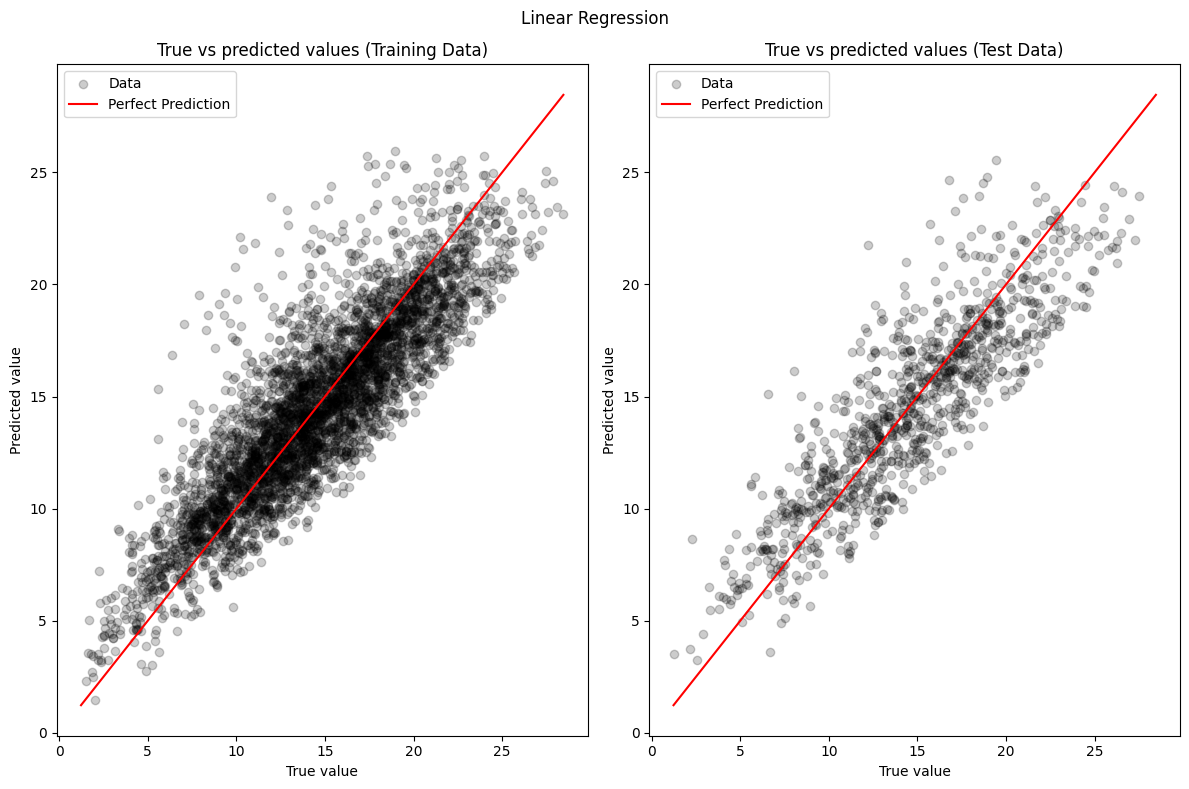

In [154]:
fig, axis = plt.subplots(1,2, figsize=(12,8))

axis[0].scatter(train_df["label"],train_results,color="black",alpha=0.2,label="Data")
axis[0].set_title('True vs predicted values (Training Data)')
axis[0].set_xlabel('True value')
axis[0].set_ylabel('Predicted value')
axis[0].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[0].legend(loc='upper left')

axis[1].scatter(test_df["label"],test_results,color="black",alpha=0.2,label="Data")
axis[1].set_title('True vs predicted values (Test Data)')
axis[1].set_xlabel('True value')
axis[1].set_ylabel('Predicted value')
axis[1].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[1].legend(loc='upper left')


fig.suptitle("Linear Regression")

fig.tight_layout()

## Task 2: Train and evaluate a decision tree model

**Tasks**:

1. Train the decision tree model (provided below) on the training data from Task 1.

2. Calculate and print the following metrics for the decision tree:
   - Training RMSE
   - Testing RMSE

3. Create a scatter plot of true vs. predicted values for the test set:
   - Add a diagonal reference line (y=x) to show perfect predictions
   - Label the axes appropriately
   - Add a title

4. Compare the decision tree metrics to the linear regression metrics from Task 1:
   - Which model has lower testing RMSE?
   - How do the two models differ in their predictions?

**Hints**:

- Use the same `X_train`, `X_test`, `y_train`, `y_test` from Task 1

In [155]:
# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_split=30, min_samples_leaf=15, random_state=315)
dt_fit_results = dt_model.fit(train_df.drop(columns="label"), train_df["label"])

# Your code here to calculate metrics and create visualizations
dt_train = dt_model.predict(train_df.drop(columns="label"))
dt_test = dt_model.predict(test_df.drop(columns="label"))

dt_train_rmse = root_mean_squared_error(train_df['label'], dt_train)
print(f'Training RMSE: {dt_train_rmse:.3f}')
print(f'{dt_train[0]} - {train_df['label'][0]}')

dt_test_rmse = root_mean_squared_error(test_df['label'], dt_test)
print(f'Test RMSE: {dt_test_rmse:.3f}')
print(f'{dt_test[0]} - {test_df['label'][0]}')


Training RMSE: 1.720
14.242287498378358 - 15.407624796381894
Test RMSE: 2.090
12.895935026199027 - 12.787012487828337


In [156]:
# Initialize and train the decision tree model
dt_depth = 3
dt_samples_split = 30
dt_samples_leaf = 5
dt_model_mod = DecisionTreeRegressor(max_depth=dt_depth, min_samples_split=dt_samples_split, min_samples_leaf=dt_samples_leaf, random_state=315)
dt_fit_results = dt_model_mod.fit(train_df.drop(columns="label"), train_df["label"])

# Your code here to calculate metrics and create visualizations
dt_train_mod = dt_model_mod.predict(train_df.drop(columns="label"))
dt_test_mod = dt_model_mod.predict(test_df.drop(columns="label"))

dt_train_rmse = root_mean_squared_error(train_df['label'], dt_train_mod)
print(f'Training RMSE: {dt_train_rmse:.3f}')
print(f'{dt_train_mod[0]} - {train_df['label'][0]}')

dt_test_rmse = root_mean_squared_error(test_df['label'], dt_test_mod)
print(f'Test RMSE: {dt_test_rmse:.3f}')
print(f'{dt_test_mod[0]} - {test_df['label'][0]}')

Training RMSE: 2.970
9.641903781429722 - 15.407624796381894
Test RMSE: 3.075
14.751044579328365 - 12.787012487828337


### Decision Tree Plots

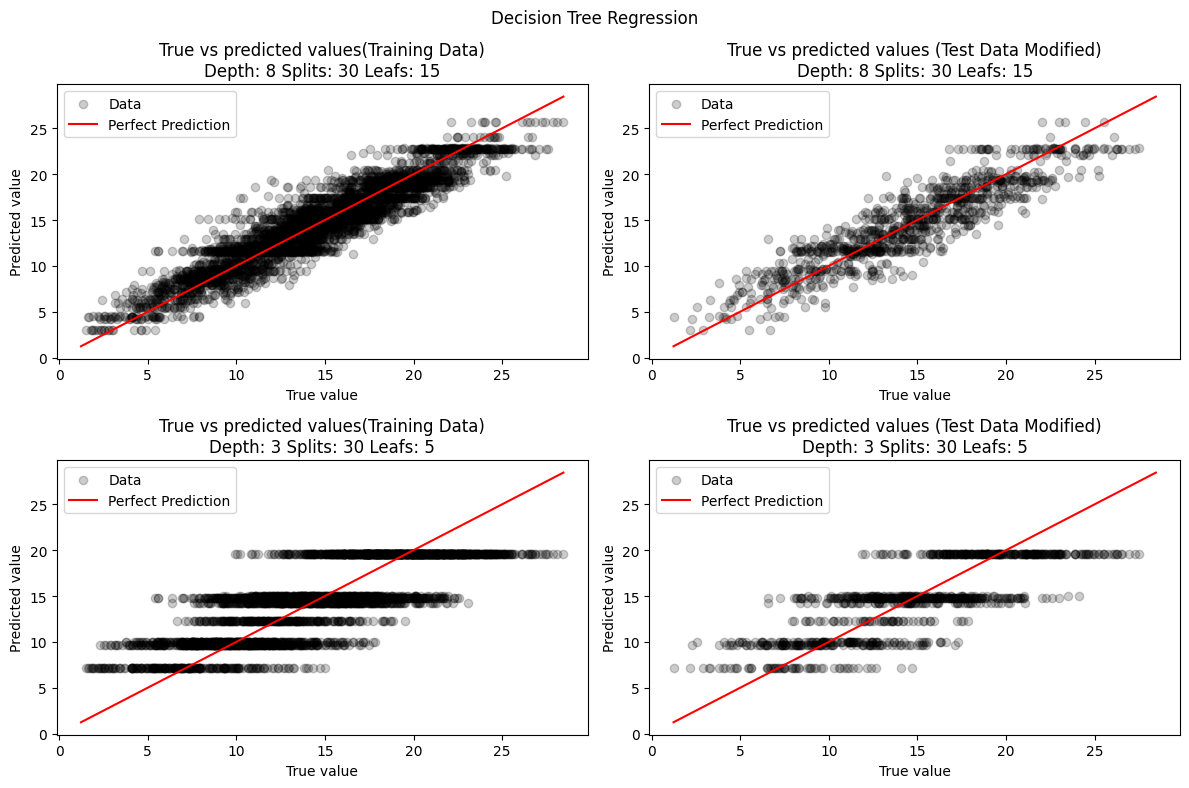

In [157]:
fig, axis = plt.subplots(2,2, figsize=(12,8))

axis[0,0].scatter(train_df["label"],dt_train,color="black",alpha=0.2,label="Data")
title_text = f'True vs predicted values(Training Data)\nDepth: 8 Splits: 30 Leafs: 15'
axis[0,0].set_title(title_text)
axis[0,0].set_xlabel('True value')
axis[0,0].set_ylabel('Predicted value')
axis[0,0].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[0,0].legend(loc='upper left')

axis[0,1].scatter(test_df["label"],dt_test,color="black",alpha=0.2,label="Data")
title_text = f'True vs predicted values (Test Data Modified)\nDepth: 8 Splits: 30 Leafs: 15'
axis[0,1].set_title(title_text)
axis[0,1].set_xlabel('True value')
axis[0,1].set_ylabel('Predicted value')
axis[0,1].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[0,1].legend(loc='upper left')

axis[1,0].scatter(train_df["label"],dt_train_mod,color="black",alpha=0.2,label="Data")
title_text = f'True vs predicted values(Training Data)\nDepth: {dt_depth} Splits: {dt_samples_split} Leafs: {dt_samples_leaf}'
axis[1,0].set_title(title_text)
axis[1,0].set_xlabel('True value')
axis[1,0].set_ylabel('Predicted value')
axis[1,0].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[1,0].legend(loc='upper left')

axis[1,1].scatter(test_df["label"],dt_test_mod,color="black",alpha=0.2,label="Data")
title_text = f'True vs predicted values (Test Data Modified)\nDepth: {dt_depth} Splits: {dt_samples_split} Leafs: {dt_samples_leaf}'
axis[1,1].set_title(title_text)
axis[1,1].set_xlabel('True value')
axis[1,1].set_ylabel('Predicted value')
axis[1,1].plot([y.min(),y.max()],[y.min(),y.max()], 
    color='red',label="Perfect Prediction")
axis[1,1].legend(loc='upper left')

fig.suptitle("Decision Tree Regression")

fig.tight_layout()

## Task 3: Investigate why the models perform differently

**Tasks**:

1. Create visualizations to understand the relationship between features and label:
   - For features 0 and 1: Create a 2D scatter plot colored by the label value (use a colormap)
   - For features 2, 3, and 4: Create individual scatter plots vs. label

2. Based on your plots:
   - Identify which relationships are linear
   - Identify which relationships are non-linear
   - Explain how this affects each model's performance

3. (Optional) Try to improve the linear regression model by adding polynomial features for the non-linear relationships. Does this improve performance?

**Hints**:

- For a 2D scatter plot with color mapping:
  - `plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')`
  - `plt.colorbar(label='Label')`

- The decision tree can capture non-linear relationships by splitting the feature space, while linear regression assumes linear relationships

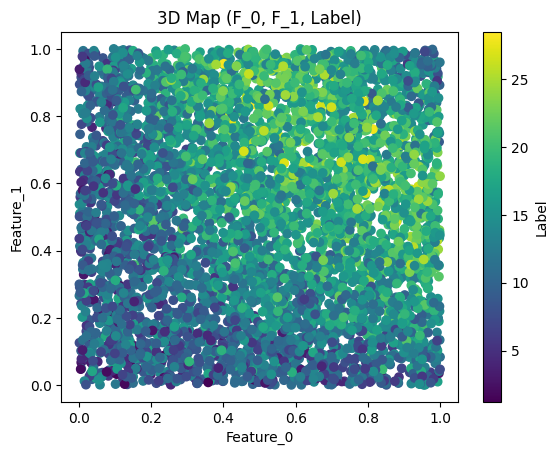

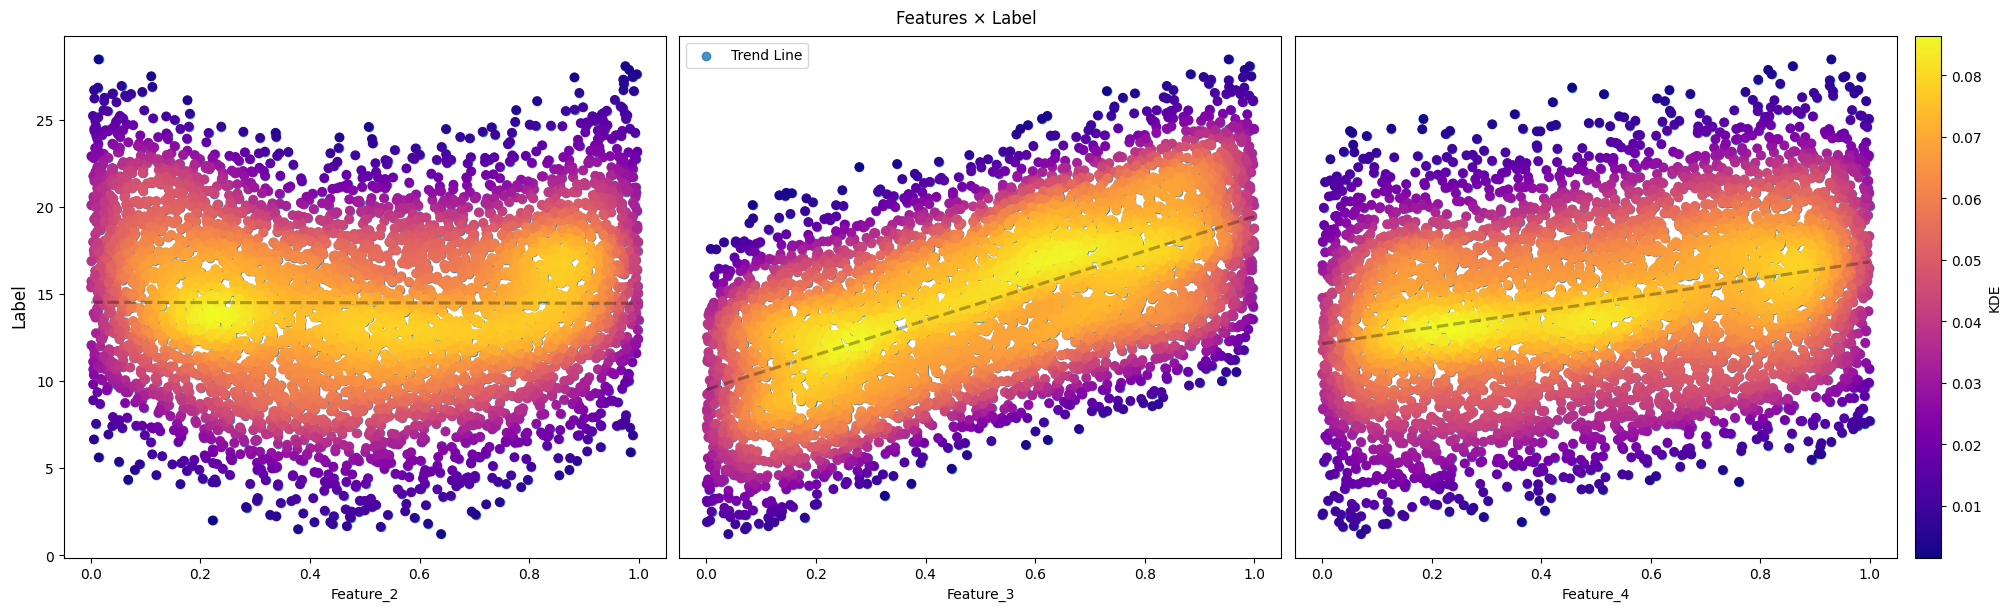

In [158]:
# Your code here
from scipy.stats import gaussian_kde
plt.scatter(df.feature_0, df.feature_1, c=y, cmap='viridis')
plt.title('3D Map (F_0, F_1, Label)')
plt.xlabel('Feature_0')
plt.ylabel('Feature_1')
plt.colorbar(label='Label')
plt.show()

sub_fig, axs = plt.subplots(1,3, sharey=True, figsize=(20,6), constrained_layout=True)
counter = 0
lkws = {'color':'black', 'linestyle':'--', 'alpha':0.3}
for ax in axs:
    df_x = df[f'feature_{counter+2}']
    xy = np.vstack([df_x, y])
    dens = gaussian_kde(xy)(xy)
    sns.regplot(x=df_x,y=y,ci=False, ax=ax, line_kws=lkws, label='Trend Line')
    plot_scat = ax.scatter(df_x, y, c=dens, cmap='plasma')
    ax.set_xlabel(f'Feature_{counter+2}')
    if counter:
        ax.tick_params(axis='y', which='both', left=False, right=False)
    counter += 1
    
sub_fig.suptitle('Features × Label', x=0.48, ha='center')
sub_fig.supylabel('Label')
axs[1].legend(loc='upper left')
plt.colorbar(plot_scat, ax=axs, pad=0.01, label='KDE')
plt.show()


## Reflection

Based on your analysis, answer the following questions:

1. **Model performance**: Which model performed better and why?

2. **Linear assumptions**: What happens when you apply linear regression to non-linear data?

3. **Model complexity**: What are the trade-offs between simpler models (linear regression) and more complex models (decision trees)?

4. **Real-world implications**: In what situations would you prefer:
   - A linear regression model?
   - A decision tree model?
   - Consider factors like interpretability, performance, and data characteristics.